# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# !pip install kaggle

In [3]:
# !cp kaggle.json /home/jupyter/.kaggle

In [4]:
# import kaggle

In [5]:
# !kaggle datasets download -d "techsash/waste-classification-data" --unzip

In [6]:
tf.__version__

'2.8.1'

In [7]:
# training_images_file   = 'gs://mnist-public/train-images-idx3-ubyte'
# training_labels_file   = 'gs://mnist-public/train-labels-idx1-ubyte'
# validation_images_file = 'gs://mnist-public/t10k-images-idx3-ubyte'
# validation_labels_file = 'gs://mnist-public/t10k-labels-idx1-ubyte'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('DATASET/TRAIN/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 color_mode= "rgb",
                                                 class_mode= "categorical")

Found 22564 images belonging to 2 classes.


### Preprocessing the Test set

In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('DATASET/TEST/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            color_mode= "rgb",
                                            class_mode= "categorical")

Found 2513 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [10]:
cnn = tf.keras.models.Sequential()

2022-06-05 15:45:15.320044: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Step 1 - Convolution

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [14]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [15]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [16]:
cnn.add(tf.keras.layers.Dense(units=2, activation='sigmoid')) #units = 2 because 2 classes

## Part 3 - Training the CNN

### Compiling the CNN

In [17]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

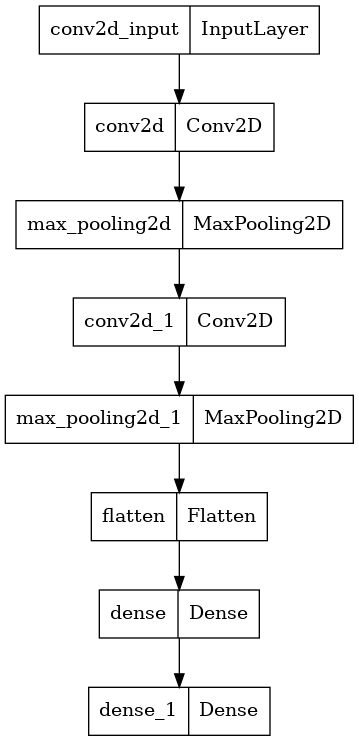

In [18]:
#layers
from keras.utils.vis_utils import plot_model
plot_model(cnn)

### Training the CNN on the Training set and evaluating it on the Test set

In [19]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
706/706 [==============================] - 350s 495ms/step - loss: 0.4436 - accuracy: 0.7999 - val_loss: 0.3636 - val_accuracy: 0.8587
Epoch 2/10
706/706 [==============================] - 162s 230ms/step - loss: 0.3924 - accuracy: 0.8294 - val_loss: 0.3357 - val_accuracy: 0.8679
Epoch 3/10
706/706 [==============================] - 155s 220ms/step - loss: 0.3689 - accuracy: 0.8421 - val_loss: 0.2939 - val_accuracy: 0.8814
Epoch 4/10
706/706 [==============================] - 159s 225ms/step - loss: 0.3523 - accuracy: 0.8473 - val_loss: 0.3409 - val_accuracy: 0.8488
Epoch 5/10
706/706 [==============================] - 159s 225ms/step - loss: 0.3371 - accuracy: 0.8565 - val_loss: 0.3285 - val_accuracy: 0.8679
Epoch 6/10
706/706 [==============================] - 163s 231ms/step - loss: 0.3300 - accuracy: 0.8600 - val_loss: 0.3343 - val_accuracy: 0.8540
Epoch 7/10
706/706 [==============================] - 157s 222ms/step - loss: 0.3200 - accuracy: 0.8652 - val_loss: 0.2798 -

## Part 4 - Making prediction

In [25]:
import numpy

In [37]:
# test_steps_per_epoch = numpy.math.ceil(test_set.samples / test_set.batch_size)

predictions = cnn.predict(test_set) #, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

In [39]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())  

In [40]:
from sklearn import metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

           O       0.56      0.60      0.58      1401
           R       0.44      0.41      0.42      1112

    accuracy                           0.51      2513
   macro avg       0.50      0.50      0.50      2513
weighted avg       0.51      0.51      0.51      2513



In [29]:
import matplotlib.pyplot as plt

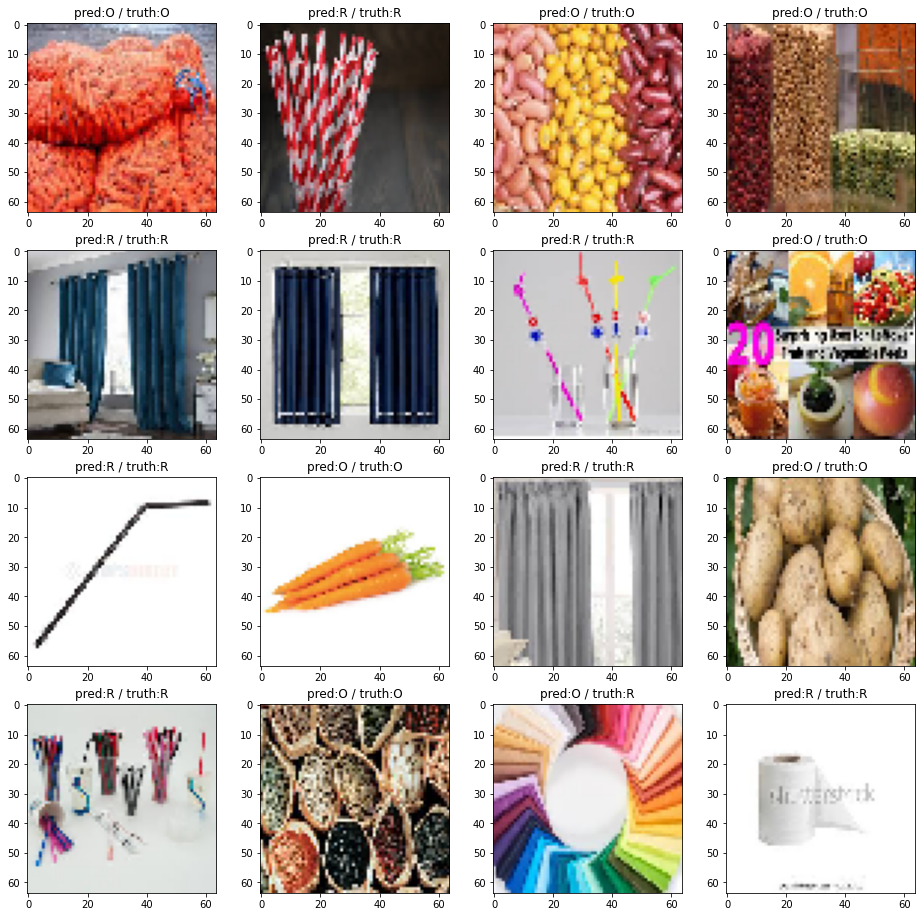

In [49]:
test_x, test_y = test_set.__getitem__(1)

labels = (test_set.class_indices)
labels = dict((v,k) for k,v in labels.items())

preds = cnn.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

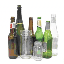

In [63]:
from keras.preprocessing import image
test_image = image.load_img('test_image.png', target_size = (64, 64))
test_image

In [64]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
predicted_class = numpy.argmax(result, axis=1)
labels[predicted_class[0]]

'R'